In [111]:
import numpy as np
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup as BS
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

In [112]:
# create a Request object for the wikipedia page for the Deadly Earthquakes
response = requests.get('https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900')

# read the resulting HTML into a variable called result_text
result_text = response.text

In [113]:
result_text;

In [114]:
print(type(response))
print(type(result_text))

<class 'requests.models.Response'>
<class 'str'>


In [115]:
# create the soup by constructing a BS object from the html page and the appropriate parser
soup = BS(result_text, 'html.parser')

In [116]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of deadly earthquakes since 1900 - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_deadly_earthquakes_since_1900","wgTitle":"List of deadly earthquakes since 1900","wgCurRevisionId":840128723,"wgRevisionId":840128723,"wgArticleId":11673441,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from July 2017","All articles needing additional references","Articles needing cleanup from July 2017","All pages needing cleanup","Cleanup tagged articles with a reason field from July 20

In [117]:
#Find all instances of sortable tables (the one we are interested in)
table = soup.findAll('table', attrs = {'class':'sortable wikitable'})

In [118]:
table

[<table class="sortable wikitable">
 <tbody><tr bgcolor="#CCCCCC">
 <th width="22%">Origin (<a class="mw-redirect" href="/wiki/UTC" title="UTC">UTC</a>)</th>
 <th width="33%">Present-day country and link to Wikipedia article</th>
 <th width="10%"><a href="/wiki/Latitude" title="Latitude">Lat</a></th>
 <th width="10%"><a href="/wiki/Longitude" title="Longitude">Long</a></th>
 <th width="8%">Depth (<a class="mw-redirect" href="/wiki/Km" title="Km">km</a>)</th>
 <th width="6%">Magnitude</th>
 <th width="9%">Secondary Effects</th>
 <th width="10%">PDE Shaking Deaths</th>
 <th width="10%">PDE Total Deaths</th>
 <th width="10%">Utsu Total Deaths</th>
 <th width="10%">EM-DAT Total Deaths</th>
 <th width="12%">Other Source Deaths
 </th></tr>
 <tr>
 <td>1900-05-11 17:23</td>
 <td>Japan</td>
 <td>38.700</td>
 <td>141.100</td>
 <td>5</td>
 <td>7.0 <a href="/wiki/Seismic_magnitude_scales#Mjma" title="Seismic magnitude scales"><span title="JMA mag.">M<sub>JMA</sub></span></a></td>
 <td></td>
 <td><

In [119]:
#Identify table rows by 'tr' tag
table_rows = table[0].findAll('tr')
table_rows

[<tr bgcolor="#CCCCCC">
 <th width="22%">Origin (<a class="mw-redirect" href="/wiki/UTC" title="UTC">UTC</a>)</th>
 <th width="33%">Present-day country and link to Wikipedia article</th>
 <th width="10%"><a href="/wiki/Latitude" title="Latitude">Lat</a></th>
 <th width="10%"><a href="/wiki/Longitude" title="Longitude">Long</a></th>
 <th width="8%">Depth (<a class="mw-redirect" href="/wiki/Km" title="Km">km</a>)</th>
 <th width="6%">Magnitude</th>
 <th width="9%">Secondary Effects</th>
 <th width="10%">PDE Shaking Deaths</th>
 <th width="10%">PDE Total Deaths</th>
 <th width="10%">Utsu Total Deaths</th>
 <th width="10%">EM-DAT Total Deaths</th>
 <th width="12%">Other Source Deaths
 </th></tr>, <tr>
 <td>1900-05-11 17:23</td>
 <td>Japan</td>
 <td>38.700</td>
 <td>141.100</td>
 <td>5</td>
 <td>7.0 <a href="/wiki/Seismic_magnitude_scales#Mjma" title="Seismic magnitude scales"><span title="JMA mag.">M<sub>JMA</sub></span></a></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td>

In [120]:
#Create data frame
data = []
for ind, tr in enumerate(table_rows):
    tag = 'td' if ind else 'th' #assign 'td' tag to all indeces and 'th' to everything else
    row = [elem.text for elem in tr.findAll(tag)] #fill the list row with the text for each element with 'tr' tag
    data.append(row)
earthquakes_df = pd.DataFrame(data[1:], columns=data[0])
earthquakes_df.head()

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,,,,,,\n
1,1900-07-12 06:25,Turkey,40.300,43.100,,5.9 Muk,,,,140,,\n
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,,,,,,\n
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,,,,,,\n
4,1901-03-31 07:11,Bulgaria,43.400,28.700,,6.4 Muk,,,,4,,\n


In [121]:
earthquakes_df.columns

Index(['Origin (UTC)', 'Present-day country and link to Wikipedia article',
       'Lat', 'Long', 'Depth (km)', 'Magnitude', 'Secondary Effects',
       'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths',
       'EM-DAT Total Deaths', 'Other Source Deaths\n'],
      dtype='object')

In [122]:
#Remove all line escapes from the end of the table values
earthquakes_df['Other Source Deaths\n'] = earthquakes_df['Other Source Deaths\n'].replace('\\n','', regex=True)
earthquakes_df

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,,,,,,
1,1900-07-12 06:25,Turkey,40.300,43.100,,5.9 Muk,,,,140,,
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,,,,,,
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,,,,,,
4,1901-03-31 07:11,Bulgaria,43.400,28.700,,6.4 Muk,,,,4,,
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,,,,,
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,,,,1,,
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,,,,1,,
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,,,,86,,
9,1902-03-09 07:46,Turkey,40.700,33.600,,5.5 Muk,,,,4,,


In [123]:

# earthquakes_df.columns

In [124]:
#Fill empty cells with NaN, remove "+" values
earthquakes_df = earthquakes_df.replace("", np.nan)
earthquakes_df['Other Source Deaths\n'] = earthquakes_df['Other Source Deaths\n'].str.replace('+', '')
earthquakes_df['Other Source Deaths\n'].unique()

array([nan, '3500', '8000', '46', '164[6]', '1500[6]', '105000', '1404',
       '1', '120', '200', None, '380', '2041', '33[8]', '45000[9]',
       '2489[10]', '26271[11] 26000[12]', '68',
       '231000*[13] 283000*[14] 227898*[15]', '41', '60[16]', '215', '34',
       '295', '79', '189', '1,115', '222,517[17]', '521[19]', '42',
       '2,698', '181', '15894[20]', '150', '111',
       '601 (as of October 30, 2011)'], dtype=object)

In [125]:
#Remove footnotes
earthquakes_df['Other Source Deaths\n'] = earthquakes_df['Other Source Deaths\n'].replace('\[\d+\]', '', regex=True)
earthquakes_df['Other Source Deaths\n'].unique()

array([nan, '3500', '8000', '46', '164', '1500', '105000', '1404', '1',
       '120', '200', None, '380', '2041', '33', '45000', '2489',
       '26271 26000', '68', '231000* 283000* 227898*', '41', '60', '215',
       '34', '295', '79', '189', '1,115', '222,517', '521', '42', '2,698',
       '181', '15894', '150', '111', '601 (as of October 30, 2011)'],
      dtype=object)

In [126]:
#Remove double entry
earthquakes_df['Other Source Deaths\n'] = earthquakes_df['Other Source Deaths\n'].str.replace('26271 26000', '26271')
earthquakes_df['Other Source Deaths\n'].unique()

array([nan, '3500', '8000', '46', '164', '1500', '105000', '1404', '1',
       '120', '200', None, '380', '2041', '33', '45000', '2489', '26271',
       '68', '231000* 283000* 227898*', '41', '60', '215', '34', '295',
       '79', '189', '1,115', '222,517', '521', '42', '2,698', '181',
       '15894', '150', '111', '601 (as of October 30, 2011)'],
      dtype=object)

In [127]:
#Remove astrisks and commas, average the triple entry
earthquakes_df['Other Source Deaths\n'].replace(regex=True,inplace=True,to_replace=r'\*', value='')
earthquakes_df['Other Source Deaths\n'].replace(regex=True,inplace=True,to_replace=r'\,', value='')
earthquakes_df['Other Source Deaths\n'] = earthquakes_df['Other Source Deaths\n'].str.replace('231000 283000 227898', '247299')
earthquakes_df['Other Source Deaths\n'].unique()

array([nan, '3500', '8000', '46', '164', '1500', '105000', '1404', '1',
       '120', '200', None, '380', '2041', '33', '45000', '2489', '26271',
       '68', '247299', '41', '60', '215', '34', '295', '79', '189',
       '1115', '222517', '521', '42', '2698', '181', '15894', '150',
       '111', '601 (as of October 30 2011)'], dtype=object)

In [128]:
#Remove parenthetical entry
earthquakes_df['Other Source Deaths\n'] = earthquakes_df['Other Source Deaths\n'].replace(' \(.*?\)', '', regex=True)
earthquakes_df['Other Source Deaths\n'].unique()

array([nan, '3500', '8000', '46', '164', '1500', '105000', '1404', '1',
       '120', '200', None, '380', '2041', '33', '45000', '2489', '26271',
       '68', '247299', '41', '60', '215', '34', '295', '79', '189',
       '1115', '222517', '521', '42', '2698', '181', '15894', '150',
       '111', '601'], dtype=object)

In [129]:
earthquakes_df

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4,NaN,NaN
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,NaN,NaN
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,NaN,1,NaN,NaN
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1,NaN,NaN
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,NaN,86,NaN,NaN
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,NaN,NaN,4,NaN,NaN


In [130]:
#ALTERNATE METHOD
# dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900', header=0, index_col=0)
# len(dfs)

In [131]:
# earthquakes = dfs[5]

In [147]:
#Standardize Magnitude column to numeric values
earthquakes_df.Magnitude = earthquakes_df.Magnitude.str.replace('5 ML', '5.0 ML') #correction for non-decimal entry
earthquakes_df.Magnitude = earthquakes_df.Magnitude.str.extract('(\d+\.\d+)')
earthquakes_df.Magnitude = pd.to_numeric(earthquakes_df.Magnitude)
earthquakes_df

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,0.0,140.0
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,0.0,4.0
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2,T,NaN,NaN,NaN,NaN,0.0,0.0
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8,NaN,NaN,NaN,1.0,NaN,0.0,1.0
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9,NaN,NaN,NaN,1.0,NaN,0.0,1.0
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9,NaN,NaN,NaN,86.0,NaN,0.0,86.0
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5,NaN,NaN,NaN,4.0,NaN,0.0,4.0


In [133]:
#convert all death columns to numeric, using same standardization as above
pd.to_datetime(earthquakes_df['Origin (UTC)'])
earthquakes_df['PDE Total Deaths'] = pd.to_numeric(earthquakes_df['PDE Total Deaths'], errors='coerce');
earthquakes_df['Utsu Total Deaths'] = pd.to_numeric(earthquakes_df['Utsu Total Deaths'], errors='coerce');

earthquakes_df['EM-DAT Total Deaths'] = earthquakes_df['EM-DAT Total Deaths'].str.replace('\n', '')
earthquakes_df['EM-DAT Total Deaths'] = earthquakes_df['EM-DAT Total Deaths'].replace('\[\d+\]', '', regex=True)
earthquakes_df['EM-DAT Total Deaths'] = earthquakes_df['EM-DAT Total Deaths'].str.replace('|', '')
earthquakes_df['Lat'] = earthquakes_df['Lat'].replace('?', np.nan)
earthquakes_df['Long'] = earthquakes_df['Long'].replace('??', np.nan)
                                                       
earthquakes_df['EM-DAT Total Deaths'] = pd.to_numeric(earthquakes_df['EM-DAT Total Deaths'], errors='coerce');
earthquakes_df[ 'Other Source Deaths\n'] = pd.to_numeric(earthquakes_df[ 'Other Source Deaths\n'], errors='coerce');

In [134]:
earthquakes_df['Other Source Deaths\n'] = earthquakes_df['Other Source Deaths\n'].fillna(0)
pd.to_numeric(earthquakes_df[ 'Other Source Deaths\n'], errors='coerce');
earthquakes_df['Other Source Deaths\n'].unique()

array([0.00000e+00, 3.50000e+03, 8.00000e+03, 4.60000e+01, 1.64000e+02,
       1.50000e+03, 1.05000e+05, 1.40400e+03, 1.00000e+00, 1.20000e+02,
       2.00000e+02, 3.80000e+02, 2.04100e+03, 3.30000e+01, 4.50000e+04,
       2.48900e+03, 2.62710e+04, 6.80000e+01, 2.47299e+05, 4.10000e+01,
       6.00000e+01, 2.15000e+02, 3.40000e+01, 2.95000e+02, 7.90000e+01,
       1.89000e+02, 1.11500e+03, 2.22517e+05, 5.21000e+02, 4.20000e+01,
       2.69800e+03, 1.81000e+02, 1.58940e+04, 1.50000e+02, 1.11000e+02,
       6.01000e+02])

In [135]:
# earthquakes_df['deaths']=0
# earthquakes_df.deaths = earthquakes_df.iterrows().loc[:, ['PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', 'Other Source Deaths\n']].max()


In [136]:
earthquakes_df

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,0.0
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,0.0
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,0.0
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,0.0
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,0.0
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2,T,NaN,NaN,NaN,NaN,0.0
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8,NaN,NaN,NaN,1.0,NaN,0.0
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9,NaN,NaN,NaN,1.0,NaN,0.0
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9,NaN,NaN,NaN,86.0,NaN,0.0
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5,NaN,NaN,NaN,4.0,NaN,0.0


In [137]:
#Create 'deaths' column containing the max for the previous four columns
earthquakes_deaths = earthquakes_df[['PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', 'Other Source Deaths\n']]
# earthquakes_deaths = earthquakes_df[['Other Source Deaths\n']]
# earthquakes_deaths = np.nanmax(earthquakes_deaths, axis=1)
earthquakes_deaths

,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,NaN,NaN,NaN,0.0
1,NaN,140.0,NaN,0.0
2,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,0.0
4,NaN,4.0,NaN,0.0
5,NaN,NaN,NaN,0.0
6,NaN,1.0,NaN,0.0
7,NaN,1.0,NaN,0.0
8,NaN,86.0,NaN,0.0
9,NaN,4.0,NaN,0.0


In [138]:
earthquakes_deaths['deaths']=0
earthquakes_deaths['deaths'] = earthquakes_deaths.max(axis=1)
earthquakes_deaths

C:\Users\jnske\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\jnske\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,deaths
0,NaN,NaN,NaN,0.0,0.0
1,NaN,140.0,NaN,0.0,140.0
2,NaN,NaN,NaN,0.0,0.0
3,NaN,NaN,NaN,0.0,0.0
4,NaN,4.0,NaN,0.0,4.0
5,NaN,NaN,NaN,0.0,0.0
6,NaN,1.0,NaN,0.0,1.0
7,NaN,1.0,NaN,0.0,1.0
8,NaN,86.0,NaN,0.0,86.0
9,NaN,4.0,NaN,0.0,4.0


In [139]:
# earthquakes_df = earthquakes_df.fillna(0)
earthquakes_df['deaths'] = earthquakes_df[['PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', 'Other Source Deaths\n']].max(axis=1)
earthquakes_df

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,0.0,140.0
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,0.0,4.0
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2,T,NaN,NaN,NaN,NaN,0.0,0.0
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8,NaN,NaN,NaN,1.0,NaN,0.0,1.0
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9,NaN,NaN,NaN,1.0,NaN,0.0,1.0
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9,NaN,NaN,NaN,86.0,NaN,0.0,86.0
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5,NaN,NaN,NaN,4.0,NaN,0.0,4.0


In [140]:
# earthquakes_df['geometry'] = earthquakes_df.apply(lambda x: Point((float(x.Long), float(x.Lat))), axis=1)
# earthquakes_map = gpd.GeoDataFrame(earthquakes_df,\
#                                    crs = ('+proj=tmerc +lat_0=0 +lon_0=138 +k=0.9996 +x_0=500000 +y_0=10000000 +ellps=GRS80 +units=m +no_defs'), \
#                                    geometry = earthquakes_df['geometry'])

In [141]:
# earthquakes_df.plot(figsize = (12, 12), legend = True)
# plt.scatter(x = earthquakes_df.Long, y = earthquakes_df.Lat, color = 'black');
# plt.show()

In [144]:
earthquakes_coords = earthquakes_df[['Lat', 'Long']]
earthquakes_coords.Lat = pd.to_numeric(earthquakes_coords.Lat, errors='coerce')
earthquakes_coords.Long = pd.to_numeric(earthquakes_coords.Long, errors='coerce')
earthquakes_coords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 2 columns):
Lat     1325 non-null float64
Long    1325 non-null float64
dtypes: float64(2)
memory usage: 21.0 KB


C:\Users\jnske\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


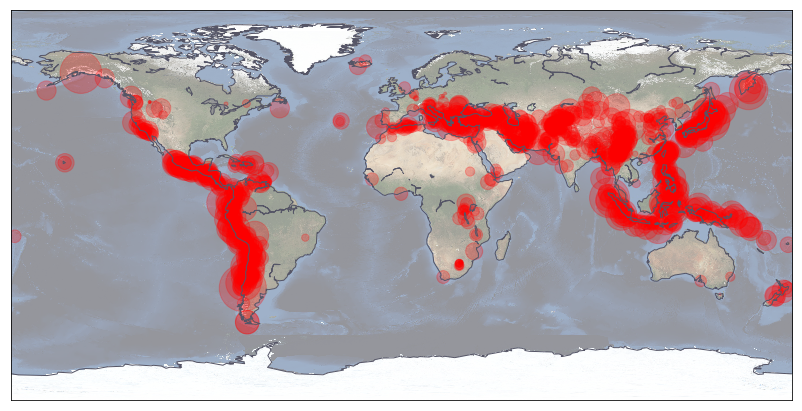

In [159]:
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(14, 8))
earth = Basemap()
earth.bluemarble(alpha=0.42)
earth.drawcoastlines(color='#555566', linewidth=1)
plt.scatter(earthquakes_coords.Long, earthquakes_coords.Lat, c='red',alpha=0.25, s=2.25**(earthquakes_df.Magnitude));

### Areas to avoid: costal areas of the Pacific Ocean and Mediterranean Sea, the Mesopotamian region, and mountainous areas of Asia, South America and Africa